<a href="https://colab.research.google.com/github/Akshata1992/TensorFlow/blob/master/TF2_0_SpamDetection_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import tensorflow library
import tensorflow as tf

In [3]:
#Import all the other libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input,LSTM,Dense,Embedding, GlobalMaxPooling1D
from tensorflow.keras.models import Model

In [4]:
#Get the data
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2020-08-19 09:57:45--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.31.80.48, 104.31.81.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  1.38MB/s    in 0.3s    

2020-08-19 09:57:46 (1.38 MB/s) - ‘spam.csv’ saved [503663/503663]



In [5]:
#read the csv ile using encoding as the file has format error
df= pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#rename the columns to labels
df.columns = ['labels','data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#create binary labels for spam and ham
df['b_labels'] = df['labels'].map({'ham':0,'spam':1})
Y = df['b_labels'].values

In [9]:
#Split into train and test data
x_train,x_test,y_train,y_test = train_test_split(df['data'],Y,test_size = 0.33)

In [10]:
#Convert the sentences to sequences
MAX_VOCAB_SIZE=20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [11]:
#get the word to integer mapping
word2idx=tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7252 unique tokens.


In [12]:
#pad sequences to get N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

T = data_train.shape[1]

Shape of data train tensor: (3733, 121)


In [13]:
data_test = pad_sequences(sequences_test,maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 121)


In [14]:
#Create our model

#choose value for D for embedding dimentionality
D = 20

#Hidden state dimentionality
M = 15

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = LSTM(M,return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

In [15]:
#complie and fit the model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
r = model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=10)

Epoch 1/10
117/117 [==============================] - 2s 13ms/step - loss: 0.4688 - accuracy: 0.8631 - val_loss: 0.3569 - val_accuracy: 0.8706
Epoch 2/10
117/117 [==============================] - 1s 10ms/step - loss: 0.3422 - accuracy: 0.8636 - val_loss: 0.3159 - val_accuracy: 0.8706
Epoch 3/10
117/117 [==============================] - 1s 10ms/step - loss: 0.3076 - accuracy: 0.8636 - val_loss: 0.2845 - val_accuracy: 0.8706
Epoch 4/10
117/117 [==============================] - 1s 10ms/step - loss: 0.2717 - accuracy: 0.8636 - val_loss: 0.2458 - val_accuracy: 0.8706
Epoch 5/10
117/117 [==============================] - 1s 10ms/step - loss: 0.2278 - accuracy: 0.8636 - val_loss: 0.2059 - val_accuracy: 0.8706
Epoch 6/10
117/117 [==============================] - 1s 10ms/step - loss: 0.1876 - accuracy: 0.8795 - val_loss: 0.1686 - val_accuracy: 0.9505
Epoch 7/10
117/117 [==============================] - 1s 10ms/step - loss: 0.1426 - accuracy: 0.9815 - val_loss: 0.1267 - val_accuracy: 0.9788

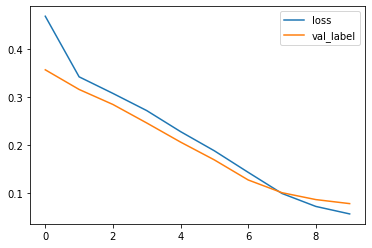

In [18]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_label')
plt.legend()

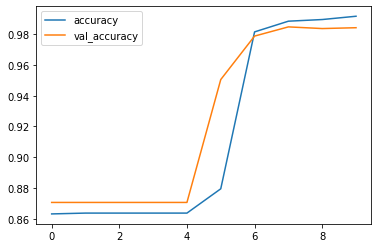

In [20]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [21]:
model.save('SpamDetectionRNN.h5')

In [22]:
res = model.evaluate(data_test,y_test)

58/58 [==============================] - 0s 4ms/step - loss: 0.0773 - accuracy: 0.9842


In [25]:
pred = model.predict(y_test)
pred

array([[0.32125404],
       [0.32125404],
       [0.32125404],
       ...,
       [0.32125404],
       [0.10485614],
       [0.32125404]], dtype=float32)